# 0.0 - Import Libraries 

In [13]:
#manipulação dos dados 
import pandas as pd 
import numpy as np

# Visualization
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# Algoritmos 
from sklearn import cluster as c
from yellowbrick.cluster import  SilhouetteVisualizer
from sklearn import metrics as mt



# 1.0 - Import Datasets 

In [14]:
df_clust = pd.read_csv('X_dataset.csv')

df_clust.head(2)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642


# 2.0 Data Preparation

**Algorithms:** K-Means e Affinity Propagation
**Performance metrics:** Silhouette Score

<Axes: >

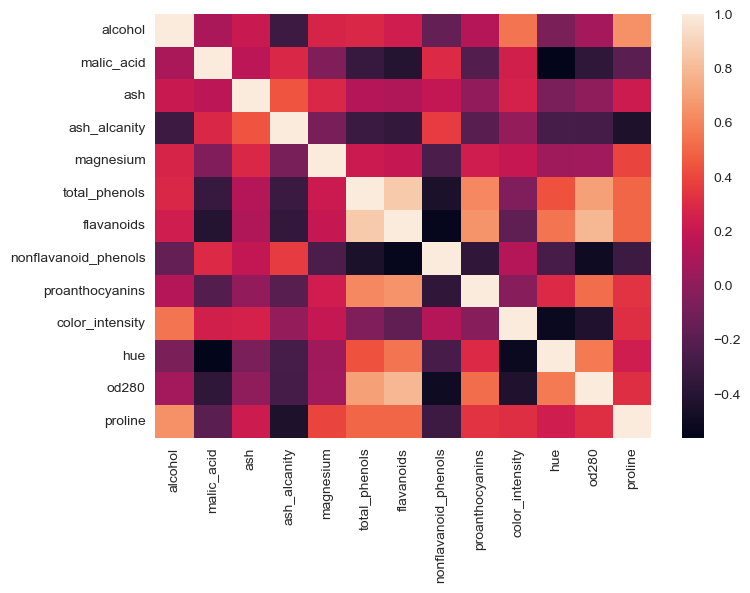

In [15]:
sns.heatmap(df_clust.corr(method='pearson'))

In [16]:
df_clust.shape

(178, 13)

# 3.0 - Clustering Model Implementation

## 3.1 Features Selection 

In [17]:
all_features = ['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
                'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline']

selected_features = ['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
                    'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline']

In [18]:
data_clust = df_clust[selected_features]

## 3.2 - K-Means 

### 3.2.1 - Finding the best K for K-Means 

In [19]:
kmeans_result = pd.DataFrame()

for k in np.arange(2, 20, 1):   
    # Model defition
    kmeans = c.KMeans(n_clusters=k, n_init=50,
                  random_state=5)
    # Model Training 
    kmeans.fit(data_clust)
    
    # Performance 
    clusters_kmeans = kmeans.predict(data_clust)
    
    # Metric
    ss_kmeans = mt.silhouette_score(data_clust, clusters_kmeans)
    
    kmeans_result = pd.concat([kmeans_result, pd.Series([k, ss_kmeans])], axis=1)
    

    
kmeans_result = kmeans_result.T
kmeans_result.columns = ['k', 'silhouette_score']

In [20]:
kmeans_result

,k,silhouette_score
0,2.0,0.213452
0,3.0,0.231842
0,4.0,0.214926
0,5.0,0.190402
0,6.0,0.223127
0,7.0,0.215713
0,8.0,0.191770
0,9.0,0.186650
0,10.0,0.179394
0,11.0,0.194274


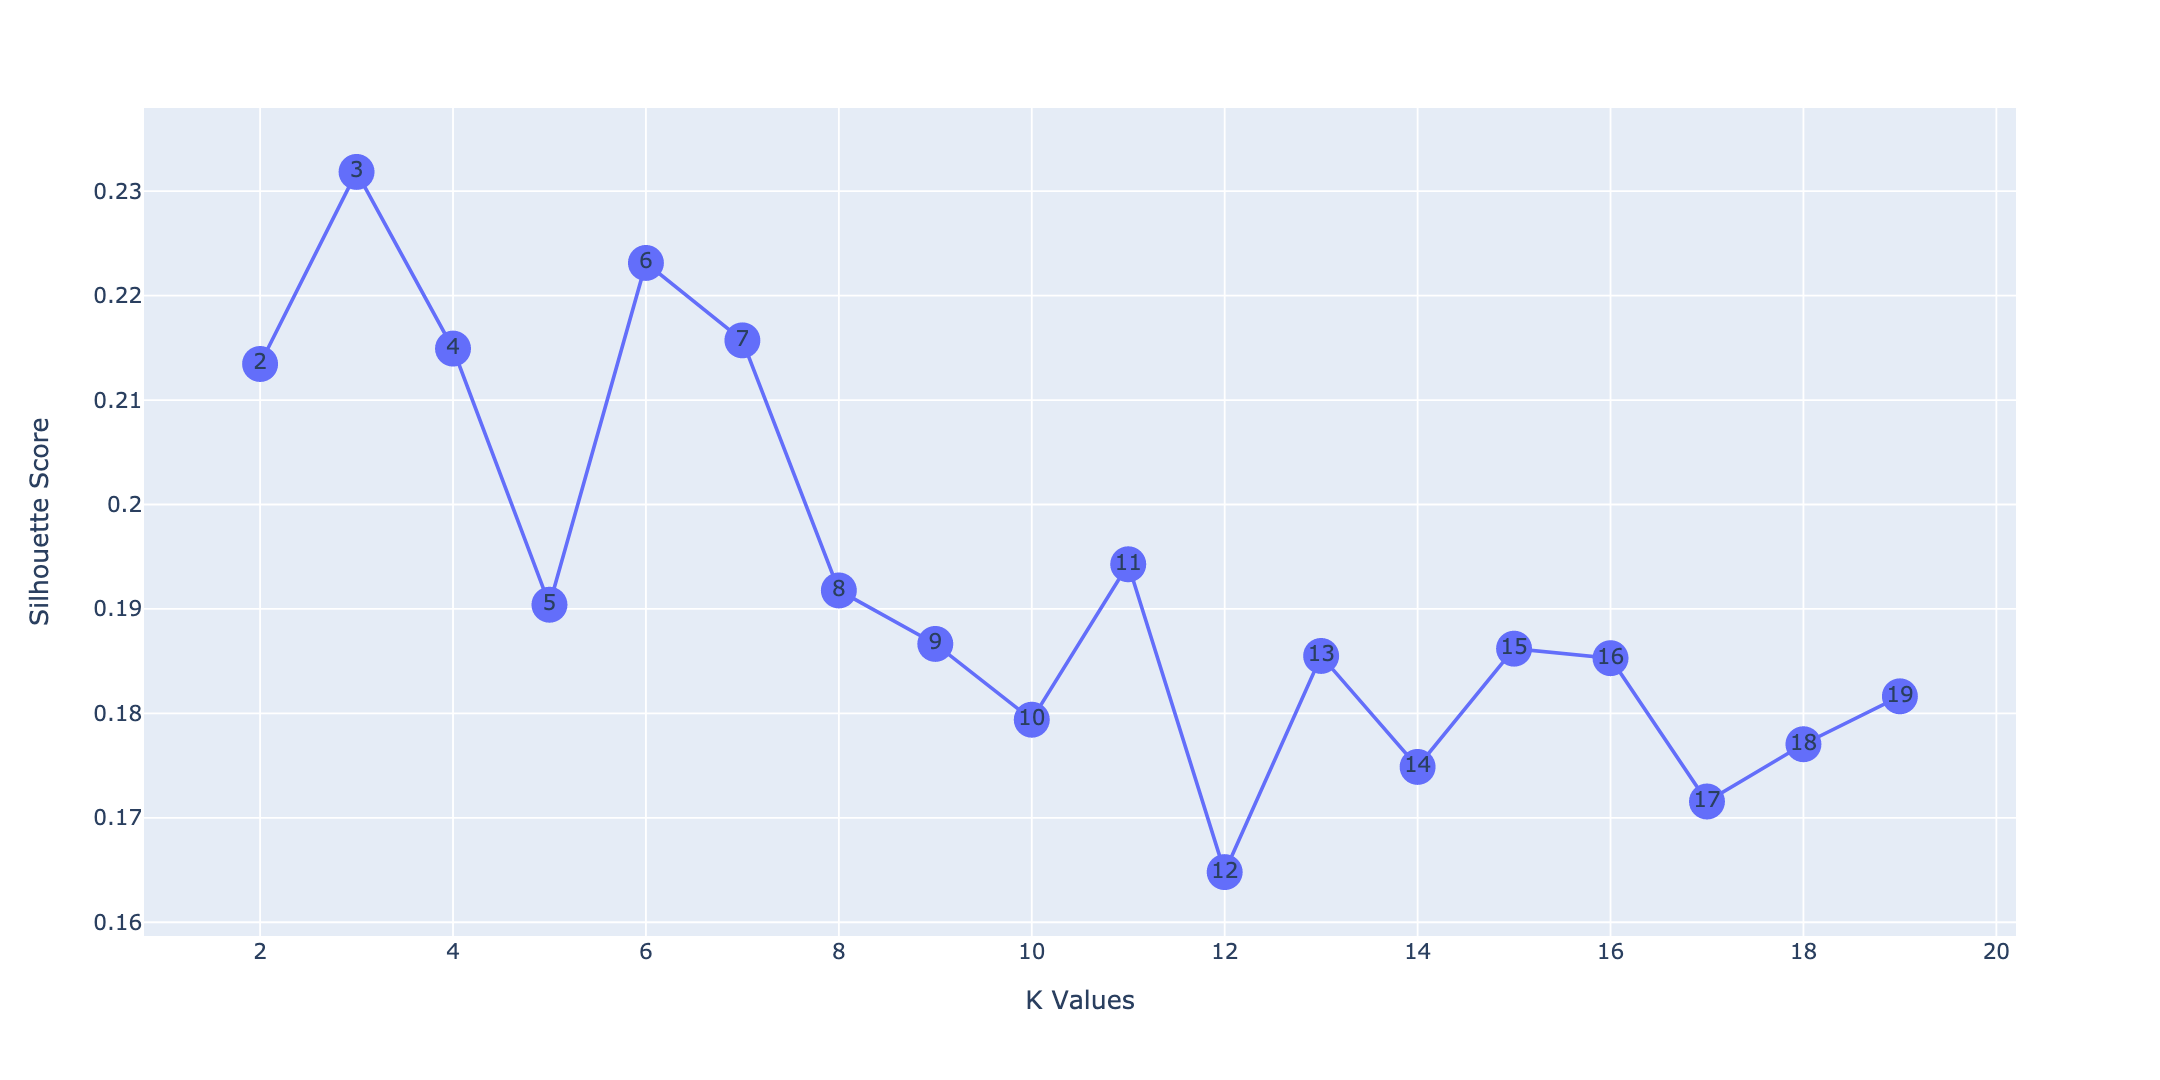

In [21]:
fig = px.line(kmeans_result,
        x = 'k',
        y = 'silhouette_score',
        labels={'k': 'K Values', 
                'silhouette_score': 'Silhouette Score'},
        text='k').update_traces(marker=dict(size=20))

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)


### 3.2.2 - Model Aplication 

In [22]:
# Model Definition
kmeans = c.KMeans(n_clusters=3, n_init=50,
                  random_state=5)

# Training 
kmeans.fit(data_clust)

# Predict
clusters_kmeans = kmeans.predict(data_clust)

n_clust1 = len(np.unique(clusters_kmeans))

# Metrics
ss_score = mt.silhouette_score(data_clust, clusters_kmeans)

print(f'Silhouette Score Result : ')
print(ss_score.round(2))

Silhouette Score Result : 
0.23


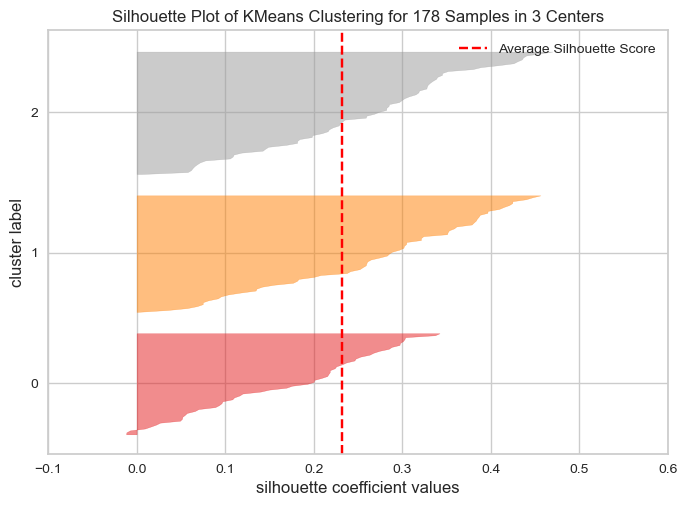

In [23]:
kmeans_clust = c.KMeans(n_clusters = 3, n_init=100, random_state=5)

sil_visualizer = SilhouetteVisualizer(kmeans_clust)
sil_visualizer.fit(data_clust)    
sil_visualizer.show();

## 3.3 - Affinity Propagation

### 3.3.1 - Finding the best value for Preference 

In [24]:
affprop_result = pd.DataFrame()

for p in np.arange(-50, 0, 2):
    # Model defition    
    affprop = c.AffinityPropagation(preference=p,
                                    random_state=5)
    # Model Training 
    affprop.fit(data_clust)
    
    # Performance
    clusters_affprop = affprop.predict(data_clust)
    
    # Metrics
    ss_affprop = mt.silhouette_score(data_clust, clusters_affprop)
    
    n_clust = len(np.unique(clusters_affprop))
    
    affprop_result = pd.concat([affprop_result, pd.Series([p, ss_affprop, n_clust])], axis=1)
    
    
    
affprop_result = affprop_result.T
affprop_result.columns = ['preference', 'silhouette_score', 'n_clusters']

In [25]:
affprop_result.round(3)

,preference,silhouette_score,n_clusters
0,-50.0,0.202,7.0
0,-48.0,0.202,7.0
0,-46.0,0.204,7.0
0,-44.0,0.185,8.0
0,-42.0,0.190,7.0
0,-40.0,0.190,7.0
0,-38.0,0.186,8.0
0,-36.0,0.186,8.0
0,-34.0,0.187,8.0
0,-32.0,0.162,10.0


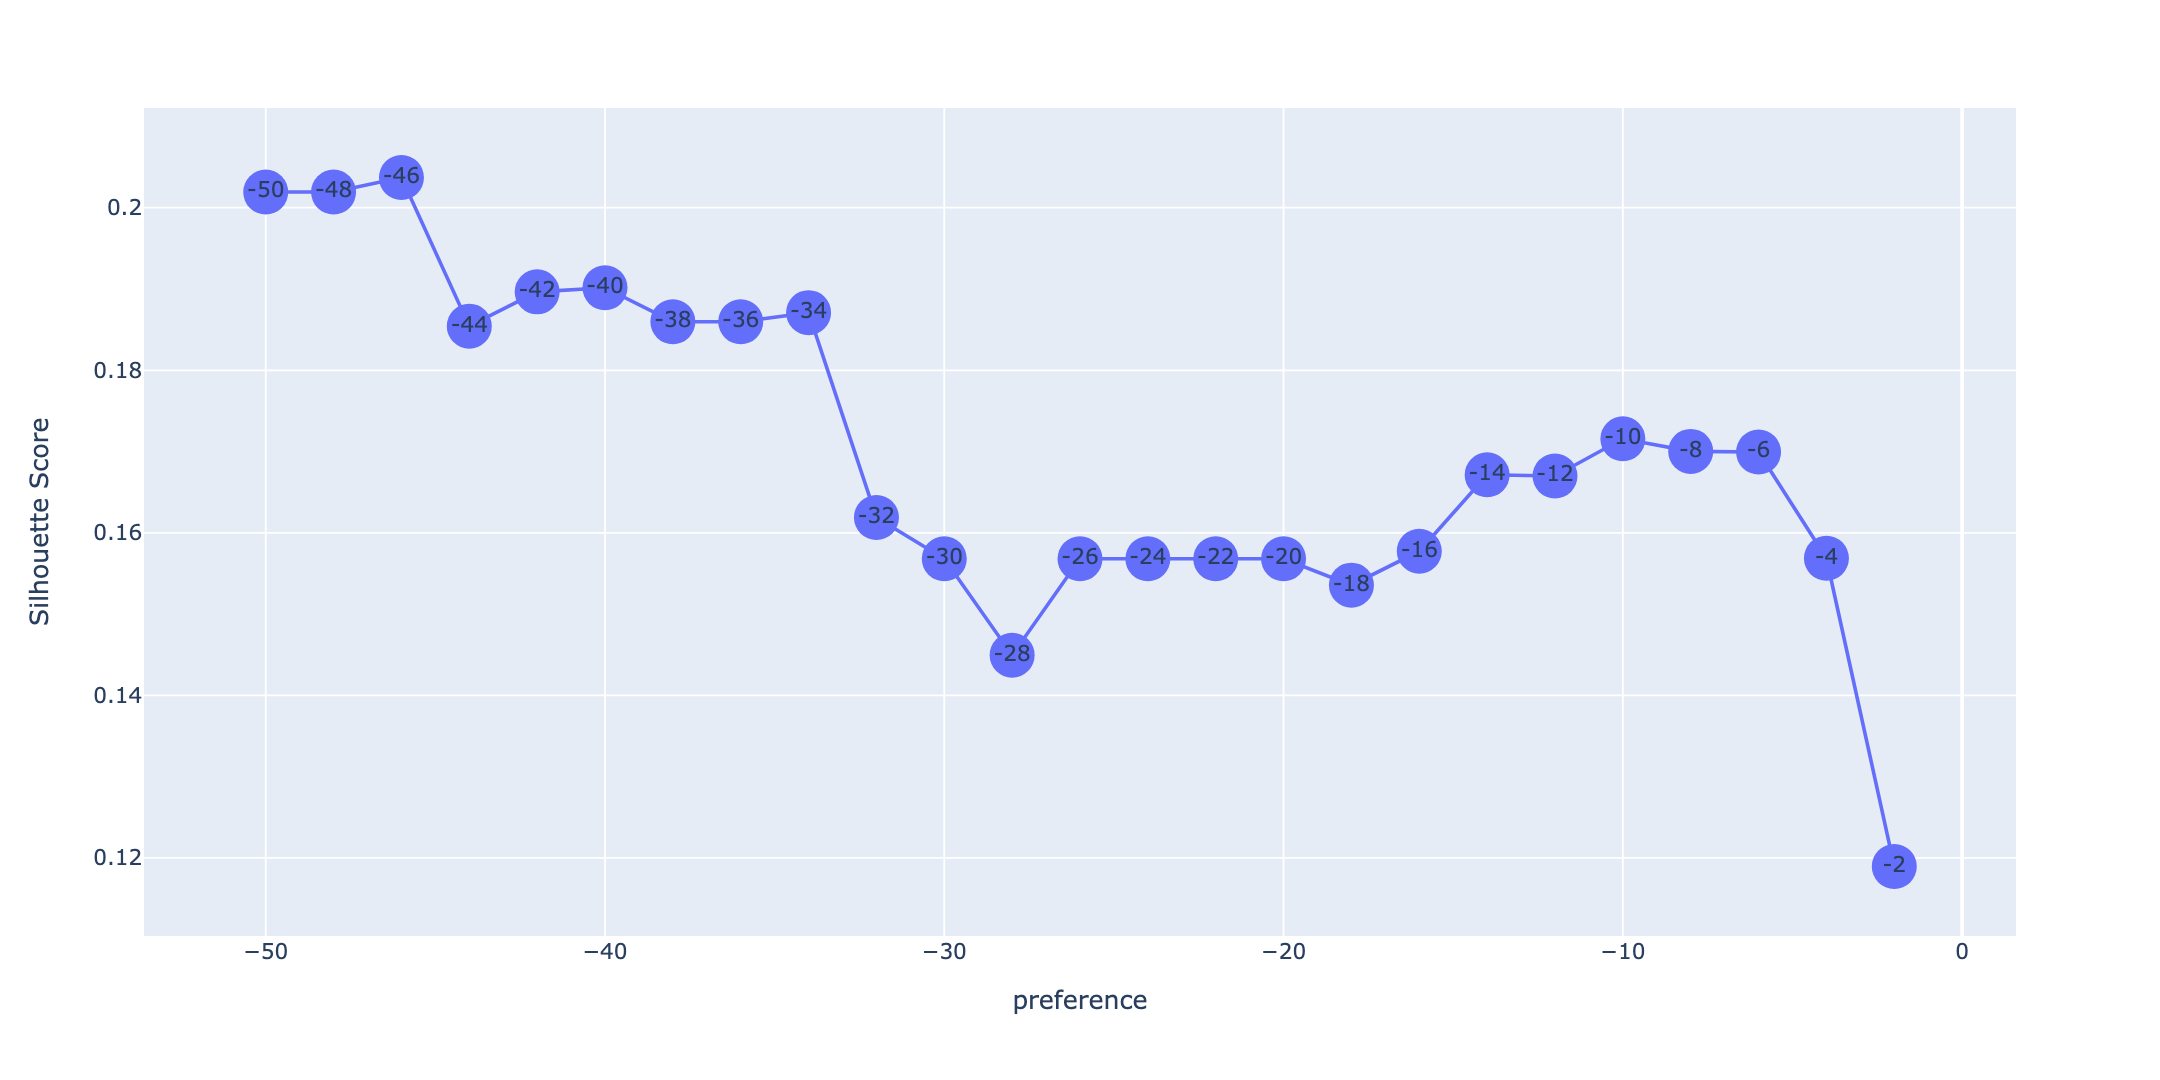

In [27]:
fig = px.line(affprop_result,
        x = 'preference',
        y = 'silhouette_score',
        labels={'p': 'Preference', 
                'silhouette_score': 'Silhouette Score'},
        text='preference').update_traces(marker=dict(size=25))

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)


### 3.3.2 - Model Aplication 

In [28]:
# Model defition    
affprop = c.AffinityPropagation(preference=-46,
                                    random_state=5)
# Model Training 
affprop.fit(data_clust)
    
# Performance
clusters_affprop = affprop.predict(data_clust)
n_clust = len(np.unique(clusters_affprop))

# Metrics
ss_affprop = mt.silhouette_score(data_clust, clusters_affprop)

print(f'Silhouette Score Result : ')
print(ss_affprop.round(3))
print(f'Numero de clusters : ')

print(n_clust )

Silhouette Score Result : 
0.204
Numero de clusters : 
7


## 3.4 - Appending Results 

In [29]:
clusters_algorithms_results = pd.DataFrame({ 'K-Means' : ss_score, 
                                             'Affinity Propagation' : ss_affprop,
                                              }, index=['Silhouette Score']).round(3)




print(clusters_algorithms_results.to_markdown())

|                  |   K-Means |   Affinity Propagation |
|:-----------------|----------:|-----------------------:|
| Silhouette Score |     0.232 |                  0.204 |
